In [ ]:
import pandas as pd

In [28]:
import os
import json
import colorsys
import random
import numpy as np
import cv2
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
from matplotlib import patches

In [29]:
from google.colab import drive
GDRIVE_PATH = "/content/gdrive/MyDrive/Semester 2/Hackathon/Project/Case3 - WSM/"
drive.mount("/content/gdrive")
TRAIN_DATA_IMAGES = "Detection_Train_Set/Detection_Train_Set_Img/"
TRAIN_DATA_LABELS = "Detection_Train_Set/Detection_Train_Set_Json/"

TRAIN_DATA_NAMES = os.listdir(GDRIVE_PATH + TRAIN_DATA_IMAGES)
print("Train Data Length", len(TRAIN_DATA_NAMES))
print("First Train Data", TRAIN_DATA_NAMES[0])

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Train Data Length 1559
First Train Data Batch2__Marseille_01frame1354.jpg


In [10]:
!ls /content/gdrive/MyDrive/Semester\ 2/Hackathon/Project/Case3\ -\ WSM/

 Detection_Test_Set   Detection_Train_Set  'Image Detection With Json.ipynb'


In [30]:
def random_colors(object_types):
    hsv = [(i / object_types, 1, 1.0) for i in range(object_types)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.seed(10) # same scheme
    random.shuffle(colors)
    return colors

def visualize_image_with_mask(filename):
    with open(GDRIVE_PATH + TRAIN_DATA_LABELS + filename + ".json") as f:
        json_data = json.load(f)
    image = cv2.imread(GDRIVE_PATH + TRAIN_DATA_IMAGES + filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    _, ax = plt.subplots(1, figsize=(20, 20))
    colors = random_colors(len(json_data["objects"]))
    height, width = image.shape[:2]
    ax.set_ylim(height + 10, -10)
    ax.set_xlim(-10, width + 10)
    ax.axis('off')
    ax.set_title(f"Name: {filename}")
    
    for i, ma_data in enumerate(json_data["objects"]):
        if ma_data["geometryType"] == "rectangle":
            x1, x2, y1, y2 =  ma_data["points"]["exterior"][0][0], \
                              ma_data["points"]["exterior"][1][0], \
                              ma_data["points"]["exterior"][0][1], \
                              ma_data["points"]["exterior"][1][1]
            p = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2,
                                  alpha=0.8, linestyle="dashed",
                                  edgecolor=colors[i], facecolor='none')
            ax.add_patch(p)
        elif ma_data["geometryType"] == "polygon":
            x1, y1 =  ma_data["points"]["exterior"][0][0], \
                      ma_data["points"]["exterior"][0][1]
            p = Polygon(ma_data["points"]["exterior"],
                        facecolor="none", edgecolor=colors[i],
                        linewidth=None, fill=True)
            p.set_fill(True)
            ax.add_patch(p)

        # Add a class object type
        ax.text(x1, y1 + 8, ma_data["classTitle"], color='w', size=11, backgroundcolor="none")
    
    image_np = image.astype(np.uint32).copy()
    ax.imshow(image_np.astype(np.uint8))
    plt.show()

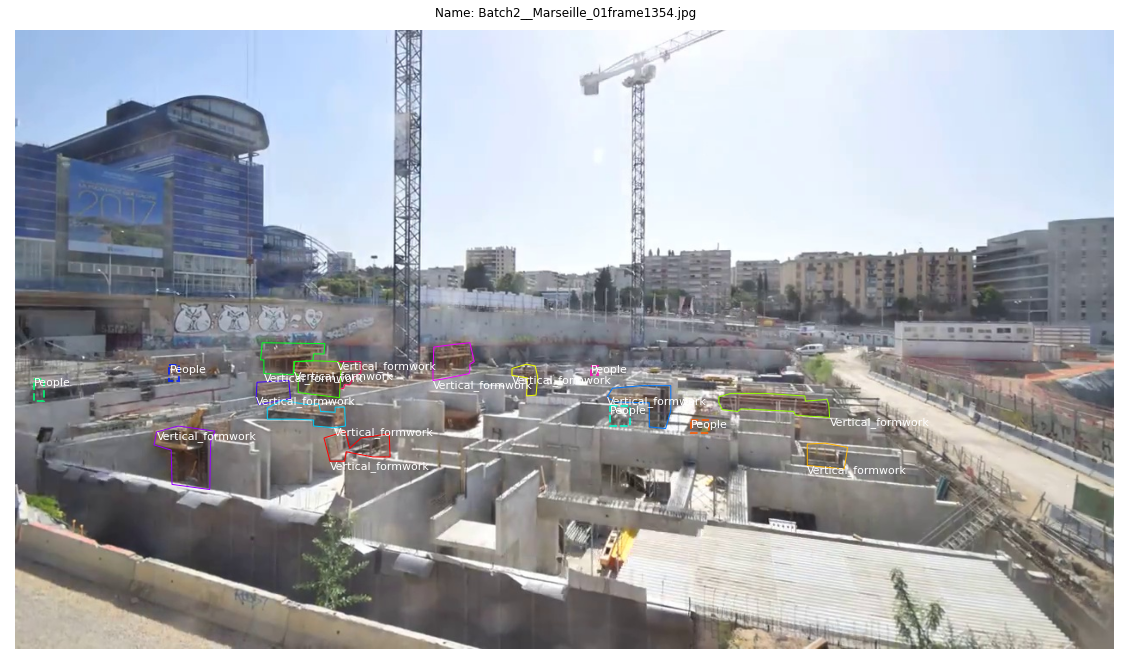

In [31]:
visualize_image_with_mask(TRAIN_DATA_NAMES[0])

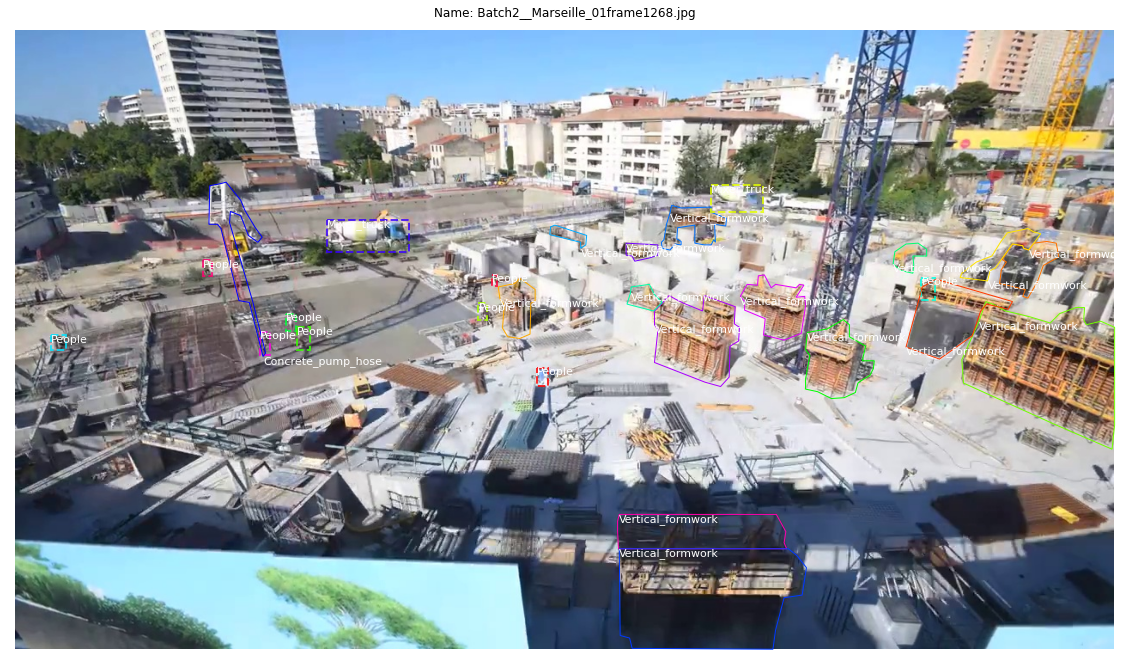

In [32]:
visualize_image_with_mask(TRAIN_DATA_NAMES[3])